# Exploratory Data Analysis

This notebook aims to explore the several csv files of the MSOAC placebo dataset. We will analyse the data and try to find patterns. The csv files that will be explored in this notebook are:

- cm.csv (Concomitant Medications)
- fa.csv (Findings About)
- ft.csv (Functional Tests)
- oe.csv (Ophthalmic Examinations)
- qs.csv (Questionnaires)
- sc.csv (Subject Characteristics)

In [86]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

def visual_progress_bar(percentage):
    """
    Display a simple visual progress bar based on the specified percentage.

    Parameters:
    - percentage: Percentage of completion (float)
    """
    length = 20  # Adjust the length of the progress bar as needed
    progress = int(length * percentage / 100)
    bar = '[' + '#' * progress + '-' * (length - progress) + ']'
    sys.stdout.write(f'\r{bar} {percentage}%')
    sys.stdout.flush()

### 1. Findings about MS disease history data (fa.csv) [one record per finding per object per time point per time point reference per visit per subject]

This dataset contains findings about **multiple sclerosis disease history**, including whether the subject has experienced at least 1 acute relapse and the number of multiple sclerosis relapses in the past 1, 2, or 3 years or since diagnosis.

In [87]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/fa.csv'

# Read the CSV file into a DataFrame
findings = pd.read_csv(file_path)
findings

,STUDYID,DOMAIN,USUBJID,FASEQ,FAGRPID,FASPID,FATESTCD,FATEST,FACAT,FASCAT,...,FAMETHOD,FABLFL,FAOBJ,FAEVAL,VISITNUM,VISIT,FADTC,FADY,FAEVLINT,FAEVINTX
0,MSOAC,FAMH,MSOAC/8028,1,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,1.0,SCREENING D-28 TO -2,NaN,NaN,-P1Y,NaN
1,MSOAC,FAMH,MSOAC/5757,2,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,1.0,V1 - SCREENING,NaN,NaN,-P2Y,NaN
2,MSOAC,FAMH,MSOAC/3737,2,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,NaN,NaN,NaN,-36.0,-P3Y,NaN
3,MSOAC,FAMH,MSOAC/3673,3,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,1.0,SCREENING D-28 TO -2,NaN,NaN,NaN,Since MS Diagnosis
4,MSOAC,FAMH,MSOAC/5603,2,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,NaN,NaN,NaN,-29.0,-P3Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,MSOAC,FAMH,MSOAC/5244,1,NaN,NaN,ACUTRLPS,Experienced at Least One Acute Relapse,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,0.0,SCREENING,NaN,-55.0,NaN,SINCE MS DIAGNOSIS
4625,MSOAC,FAMH,MSOAC/0885,3,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,1.0,SCREENING D-28 TO -2,NaN,NaN,NaN,Since MS Diagnosis
4626,MSOAC,FAMH,MSOAC/2774,1,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,10.0,SCREENING,NaN,NaN,-P1Y,NaN
4627,MSOAC,FAMH,MSOAC/0521,3,NaN,NaN,NUMRLPS,Number of MS Relapses,NaN,NaN,...,NaN,NaN,MS DISEASE HISTORY,NaN,1.0,V1 - SCREENING,NaN,NaN,NaN,Since MS Diagnosis


Check how many missing values we have per column.

In [88]:
missing_percentage_findings = (findings.isnull().sum() / len(findings)) * 100
missing_findings = pd.DataFrame({'Column Name': missing_percentage_findings.index, 'Missing Percentage': missing_percentage_findings.values})
missing_findings = missing_findings.sort_values(by='Missing Percentage', ascending=False)
print(missing_findings)

   Column Name  Missing Percentage
14    FASTRESU          100.000000
15      FASTAT          100.000000
25       FADTC          100.000000
22      FAEVAL          100.000000
4      FAGRPID          100.000000
5       FASPID          100.000000
20      FABLFL          100.000000
19    FAMETHOD          100.000000
8        FACAT          100.000000
9       FASCAT          100.000000
18       FALAT          100.000000
11    FAORRESU          100.000000
17       FALOC          100.000000
16    FAREASND          100.000000
28    FAEVINTX           76.928062
26        FADY           71.894578
27    FAEVLINT           23.071938
23    VISITNUM           21.602938
24       VISIT           21.602938
13    FASTRESN            6.588896
1       DOMAIN            0.000000
12    FASTRESC            0.000000
10     FAORRES            0.000000
7       FATEST            0.000000
6     FATESTCD            0.000000
21       FAOBJ            0.000000
3        FASEQ            0.000000
2      USUBJID      

We will drop the columns with only missing values.

In [89]:
# Set the threshold for missing percentage
threshold = 100

# Filter columns based on missing percentage
columns_to_drop = missing_findings[missing_findings['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
findings = findings.drop(columns=columns_to_drop)

In [90]:
# the column studyid is redundant so we remove it
studyid_values = findings['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = findings['DOMAIN'].unique()
print(studyid_values)

# the column faobj is also redundant so we remove it
studyid_values = findings['FAOBJ'].unique()
print(studyid_values)

['MSOAC']
['FAMH']
['MS DISEASE HISTORY']


In [91]:
findings = findings.drop(columns=['STUDYID', 'DOMAIN', 'FAOBJ', 'FATESTCD', 'FAORRES'])
findings.sort_values(by=['USUBJID', 'FASEQ'], inplace=True)
findings

,USUBJID,FASEQ,FATEST,FASTRESC,FASTRESN,VISITNUM,VISIT,FADY,FAEVLINT,FAEVINTX
1289,MSOAC/0014,1,Number of MS Relapses,1,1.0,1.0,SCREENING D-28 TO -2,NaN,-P1Y,NaN
1616,MSOAC/0014,2,Number of MS Relapses,2,2.0,1.0,SCREENING D-28 TO -2,NaN,-P2Y,NaN
4602,MSOAC/0014,3,Number of MS Relapses,3,3.0,1.0,SCREENING D-28 TO -2,NaN,NaN,Since MS Diagnosis
1912,MSOAC/0024,1,Number of MS Relapses,00,0.0,-1.0,PRIOR TO RANDOMIZATION,NaN,-P1Y,NaN
1887,MSOAC/0024,2,Number of MS Relapses,00,0.0,-1.0,PRIOR TO RANDOMIZATION,NaN,-P3Y,NaN
...,...,...,...,...,...,...,...,...,...,...
1021,MSOAC/9995,2,Number of MS Relapses,3,3.0,1.0,V1 - SCREENING,NaN,-P2Y,NaN
2750,MSOAC/9995,3,Number of MS Relapses,7,7.0,1.0,V1 - SCREENING,NaN,NaN,Since MS Diagnosis
1340,MSOAC/9999,1,Number of MS Relapses,1,1.0,1.0,SCREENING D-28 TO -2,NaN,-P1Y,NaN
4213,MSOAC/9999,2,Number of MS Relapses,2,2.0,1.0,SCREENING D-28 TO -2,NaN,-P2Y,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **FAOBJ**: Object of the Observation (irrelevant - always the same value)
- **FATESTCD**: Findings About Test Short Name (contains the same info as "FATEST" = Findings About Test Name)
- **FAORRES**: Result or Finding in Original Units (contains the same info as "FASTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of FAORRES e.g. Y Yes YES used interchangeably for the same thing)
- **FASTRESU, FASTAT, FADTC, FAEVAL, FAGRPID, FASPID, FABLFL, FAMETHOD, FACAT, FASCAT, FALAT, FAORRESU, FALOC, FAREASND**: all observations missing and not even mentioned in the data dictionary  

For how many patients do we have data about MS disease history?

In [92]:
unique_usubjid_count = findings['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2086


**Note that we don't have data on all the 2465 patients in this dataset!**

In [93]:
# Since MS Diagnosis and SINCE MS DIAGNOSIS is the same thing so convert 'FAEVINTX' column to uppercase
findings['FAEVINTX'] = findings['FAEVINTX'].str.upper()

Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [94]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in findings.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df


,Column,Type
0,USUBJID,categorical
1,FASEQ,numeric
2,FATEST,categorical
3,FASTRESC,categorical
4,FASTRESN,numeric
5,VISITNUM,numeric
6,VISIT,categorical
7,FADY,numeric
8,FAEVLINT,categorical
9,FAEVINTX,categorical


- Descriptive statistics for numeric variables

In [95]:
numeric_columns = ['FASEQ', 'FASTRESN', 'VISITNUM', 'FADY']

descriptive_numeric = {
    'Count': findings[numeric_columns].count(), #cases that are not missing
    'Missing Cases': findings[numeric_columns].isna().sum(),
    'Median': findings[numeric_columns].median(),
    'Standard Deviation': findings[numeric_columns].std()
}

num_findings = pd.DataFrame(descriptive_numeric)
num_findings 

,Count,Missing Cases,Median,Standard Deviation
FASEQ,4629,0,2.0,0.730450
FASTRESN,4324,305,2.0,2.454083
VISITNUM,3629,1000,1.0,3.507341
FADY,1301,3328,-32.0,14.244152


- FASEQ (Sequence number) is a discrete variable with values 1, 2 or 3.

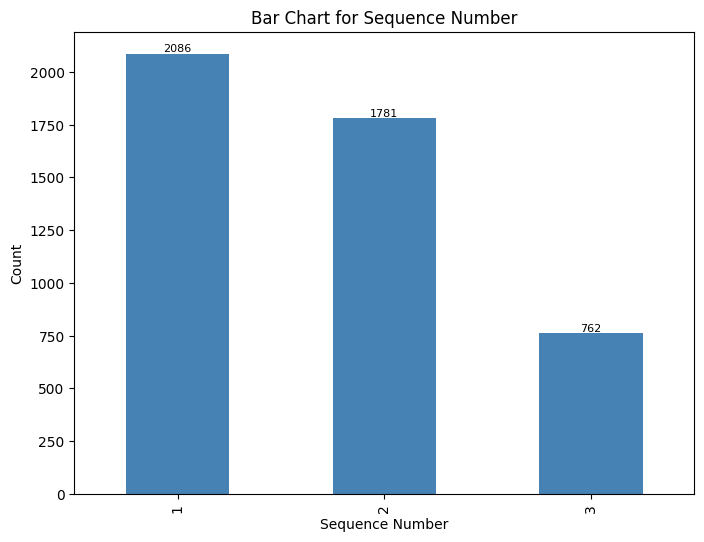

In [195]:
FASEQ = findings['FASEQ'].dropna()

plt.figure(figsize=(8, 6))

ax = FASEQ.value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Bar Chart for Sequence Number')

plt.show()

- FASTRESN (Numeric Result/Finding in Standard Units) = Number of MS Relapses


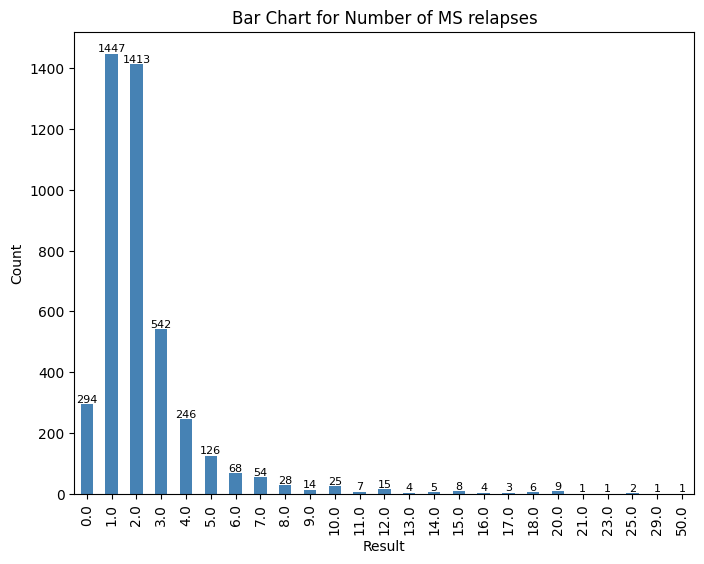

In [196]:
FASTRESN = findings['FASTRESN'].dropna()

plt.figure(figsize=(8, 6))
ax = FASTRESN.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Bar Chart for Number of MS relapses')
plt.show()

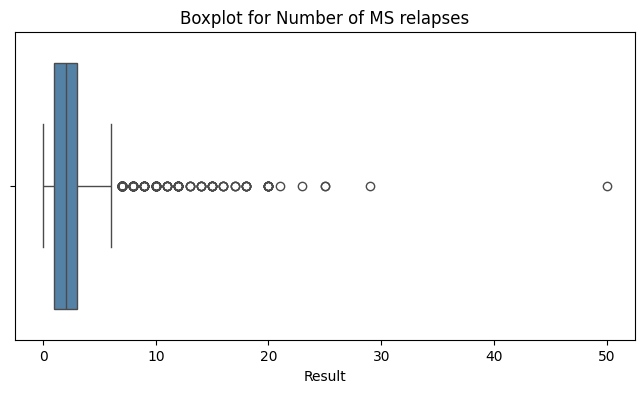

In [197]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=FASTRESN, color='steelblue')  # Use x instead of y for horizontal boxplot
plt.xlabel('Result')
plt.title('Boxplot for Number of MS relapses')
plt.show()

- VISITNUM (Visit Number) is discrete

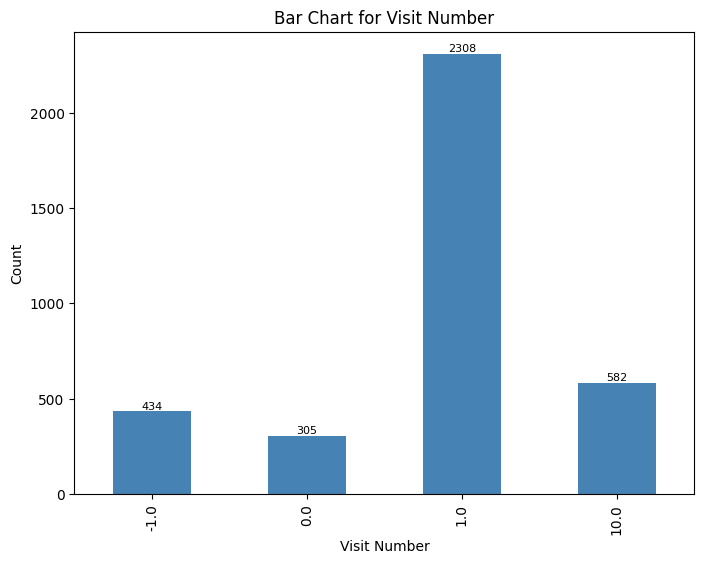

In [198]:
VISITNUM = findings['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = VISITNUM.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Bar Chart for Visit Number')
plt.show()


- FADY (Study Day of Collection) is discrete 

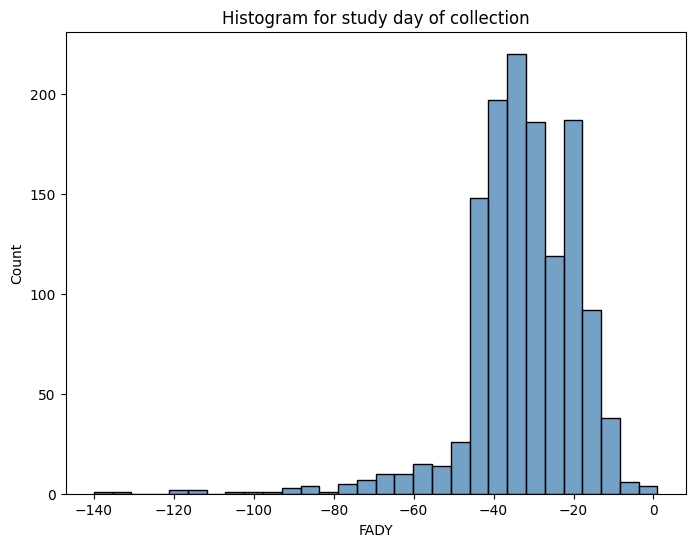

In [201]:
FADY = findings['FADY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FADY, kde=False, color='steelblue', bins=30)
plt.xlabel('FADY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')

plt.show()

- Descriptive statistics for categorical variables

In [96]:
categorical_columns = ['FATEST', 'FASTRESC', 'VISIT', 'FAEVLINT', 'FAEVINTX']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': findings[col].count(),
        'Missing Cases': findings[col].isna().sum(),
        'Unique Values': findings[col].nunique(),
        'Mode': findings[col].mode().values[0],
        'Mode Frequency': findings[col].value_counts().max()
    }

cat_findings = pd.DataFrame(descriptive_categorical).T
cat_findings

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
FATEST,4629,0,2,Number of MS Relapses,4324
FASTRESC,4629,0,35,2,1371
VISIT,3629,1000,4,V1 - SCREENING,1248
FAEVLINT,3561,1068,3,-P1Y,1781
FAEVINTX,1068,3561,1,SINCE MS DIAGNOSIS,1068


- Number of observations for each FATEST (Findings About Test Name) category

In [97]:
FATEST_counts = findings['FATEST'].value_counts().reset_index()
FATEST_counts.columns = ['FATEST', 'Count']
FATEST_counts

,FATEST,Count
0,Number of MS Relapses,4324
1,Experienced at Least One Acute Relapse,305


- Number of observations for each FASTRESC (Character Result/Finding in Std Format) category

In [176]:
FASTRESC_counts = findings['FASTRESC'].value_counts().reset_index()
FASTRESC_counts.columns = ['FASTRESC', 'Count']
FASTRESC_counts

# contains both yes/no and numbers - look at it together with FATEST!

# only need to look at the categorical ones here because the numerical ones are the values of FASTRESN so already looked at this

,FASTRESC,Count
0,2,1371
1,1,1329
2,3,518
3,Y,303
4,4,238
5,00,230
6,5,125
7,01,118
8,0,64
9,6,63


In [99]:
# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=findings['FATEST'], columns=findings['FASTRESC'], margins=True, margins_name='Total')

# Display the counts table
counts_table

FASTRESC,0,00,01,02,03,04,05,06,07,1,...,4,5,50,6,7,8,9,N,Y,Total
FATEST,,,,,,,,,,,,,,,,,,,,,
Experienced at Least One Acute Relapse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,303,305
Number of MS Relapses,64,230,118,42,24,8,1,5,2,1329,...,238,125,1,63,52,28,14,0,0,4324
Total,64,230,118,42,24,8,1,5,2,1329,...,238,125,1,63,52,28,14,2,303,4629


- Number of observations for each VISIT (Visit Name) category 

In [100]:
VISIT_counts = findings['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,V1 - SCREENING,1248
1,SCREENING D-28 TO -2,1060
2,SCREENING,887
3,PRIOR TO RANDOMIZATION,434


- Number of observations for each FAEVLINT (Evaluation Interval) category

Indicates the evaluation time period of the test in ISO 8601 format.  For example, FAEVLINT="-P1Y" indicates an evaluation interval of the past 1 year relative to the visit day.

In [101]:
FAEVLINT_counts = findings['FAEVLINT'].value_counts().reset_index()
FAEVLINT_counts.columns = ['FAEVLINT', 'Count']
print(FAEVLINT_counts)

  FAEVLINT  Count
0     -P1Y   1781
1     -P3Y   1008
2     -P2Y    772


- Number of observations for each FAEVINTX (Evaluation Interval Text) category

Indicates the evaluation time period of the test when it cannot be expressed in ISO 8601 format.

In [102]:
FAEVINTX_counts = findings['FAEVINTX'].value_counts().reset_index()
FAEVINTX_counts.columns = ['FAEVINTX', 'Count']
print(FAEVINTX_counts)

# Should be combined into the same thing

             FAEVINTX  Count
0  SINCE MS DIAGNOSIS   1068


#### *Questions and ideas*:
- make FAEVLINT into a numerical column somehow, but how to combine it with FAEVINTX? Because when 1 of the 2 is missing, the other isn't (so both columns together have 0% missing)
- how to interpret the values of VISIT?
- What to do with FATEST, FAORRES & FARESC?
- How to interpret FADY, like why is it negative so often?

### 2. Functional tests (ft.csv) - [One record per functional test per task per repetition per time point per visit per subject]

This dataset contains info on Timed 25-Foot Walk (T25FW), Nine Hole Peg Test (NHPT), Paced Auditory Serial Addition Test (PASAT), and Symbol Digit Modalities Test (SDMT).

In [103]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/ft.csv'

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)
ftests

C:\Users\lenne\AppData\Local\Temp\ipykernel_16764\3907527313.py:5: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,FTSEQ,FTGRPID,FTREFID,FTSPID,FTTESTCD,FTTEST,FTTSTDTL,...,VISIT,VISITDY,FTDTC,FTDY,FTTPT,FTTPTNUM,FTELTM,FTTPTREF,FTRFTDTC,FTREPNUM
0,MSOAC,FT,MSOAC/7115,6,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,2.0
1,MSOAC,FT,MSOAC/7115,5,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0
2,MSOAC,FT,MSOAC/7115,3,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,2.0
3,MSOAC,FT,MSOAC/7115,2,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0
4,MSOAC,FT,MSOAC/7115,10,T25FW001,NaN,NaN,T25FW101,T25FW1-Time to Complete 25-Foot Walk,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241351,MSOAC,FT,MSOAC/6673,78,T25FW008,NaN,NaN,T25FW102,T25FW1-More Than Two Attempts,NaN,...,UNSCHEDULED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241352,MSOAC,FT,MSOAC/6720,40,T25FW005,NaN,NaN,T25FW102,T25FW1-More Than Two Attempts,NaN,...,UNSCHEDULED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241353,MSOAC,FT,MSOAC/8672,20,T25FW003,NaN,NaN,T25FW102,T25FW1-More Than Two Attempts,NaN,...,UNSCHEDULED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241354,MSOAC,FT,MSOAC/9011,53,T25FW006,NaN,NaN,T25FW102,T25FW1-More Than Two Attempts,NaN,...,UNSCHEDULED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check how many missing values we have per column.

In [104]:
missing_percentage_ftests = (ftests.isnull().sum() / len(ftests)) * 100
missing_ftests = pd.DataFrame({'Column Name': missing_percentage_ftests.index, 'Missing Percentage': missing_percentage_ftests.values})
missing_ftests = missing_ftests.sort_values(by='Missing Percentage', ascending=False)
print(missing_ftests)

   Column Name  Missing Percentage
12       FTPOS          100.000000
34    FTRFTDTC          100.000000
33    FTTPTREF          100.000000
32      FTELTM          100.000000
5      FTREFID          100.000000
6       FTSPID          100.000000
21    FTMETHOD          100.000000
23     FTDRVFL          100.000000
9     FTTSTDTL          100.000000
20       FTNAM          100.000000
24      FTEVAL          100.000000
28       FTDTC           99.741461
19    FTREASND           98.910738
18      FTSTAT           98.466166
22      FTBLFL           96.126469
30       FTTPT           93.224946
31    FTTPTNUM           93.224946
27     VISITDY           84.545236
14    FTORRESU           42.144384
17    FTSTRESU           42.144384
35    FTREPNUM           41.147931
11      FTSCAT           33.508179
4      FTGRPID           33.461774
16    FTSTRESN           27.668258
29        FTDY           24.805267
15    FTSTRESC            1.518089
13     FTORRES            1.518089
1       DOMAIN      

In [105]:
# Set the threshold for missing percentage
threshold = 90

# Filter columns based on missing percentage
columns_to_drop = missing_ftests[missing_ftests['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
ftests = ftests.drop(columns=columns_to_drop)

In [106]:
# the column studyid is redundant so we remove it
studyid_values = ftests['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = ftests['DOMAIN'].unique()
print(studyid_values)

['MSOAC']
['FT']


In [107]:
ftests = ftests.drop(columns=['STUDYID', 'DOMAIN', 'FTTESTCD', 'FTORRES', 'FTORRESU', 'FTSTRESU'])
ftests.sort_values(by=['USUBJID', 'FTSEQ'], inplace=True)
ftests

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
193389,MSOAC/0014,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,2.0,BASELINE,NaN,NaN,1.0
193354,MSOAC/0014,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,BASELINE,NaN,NaN,2.0
196691,MSOAC/0014,3,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,BASELINE,NaN,NaN,NaN
192233,MSOAC/0014,4,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,25.6,25.6,2.0,BASELINE,NaN,NaN,1.0
191936,MSOAC/0014,5,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,23.7,23.7,2.0,BASELINE,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239739,MSOAC/9999,56,NHPT006,NHPT01-More Than Two Attempts,NHPT,DOMINANT HAND,N,NaN,779.0,STUDY COMPLETION,NaN,NaN,NaN
237994,MSOAC/9999,57,NHPT006,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,NON-DOMINANT HAND,25.6,25.6,779.0,STUDY COMPLETION,NaN,NaN,1.0
238046,MSOAC/9999,58,NHPT006,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,NON-DOMINANT HAND,26.7,26.7,779.0,STUDY COMPLETION,NaN,NaN,2.0
240196,MSOAC/9999,59,NHPT006,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,N,NaN,779.0,STUDY COMPLETION,NaN,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **FTTESTCD**: Functional Test Short Name (contains the same info as "FTTEST" = Functional Test Name)
- **FTORRES**: Finding in Original Units (contains the same info as "FTSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of FTORRES e.g. Y Yes YES used interchangeably for the same thing)
- **FTORRESU, FTSTRESU**: Original & Standard units (seconds in both cases)
- **FTPOS, FTRFTDTC, FTTPTREF, FTELTM, FTREFID, FTSPID, FTMETHOD, FTDRVFL, FTTSTDTL, FTNAM, FTEVAL**: all values missing and not even mentioned in the data dictionary 
- **FTDTC**: Date/Time of Finding (missing for 99.7% of observations)
- **FTTPT, FTTPTNUM**: Planned Time Point Name & Number (missing for 93.2% of observations)

Unsure if it's ok that I dropped these:
- **FTREASND**: Reason Not Performed (missing for 98.9% of observations)
- **FTSTAT**: Completion Status (missing for 98.5% of observations)
- **FTBLFL**: Baseline Flag (missing for 96.1% of observations)

For how many patients do we have data about functional tests?

In [108]:
unique_usubjid_count = ftests['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in this dataset!**

Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [109]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in ftests.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,FTSEQ,numeric
2,FTGRPID,categorical
3,FTTEST,categorical
4,FTCAT,categorical
5,FTSCAT,categorical
6,FTSTRESC,categorical
7,FTSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [110]:
numeric_columns = ['FTSEQ', 'FTSTRESN', 'VISITNUM', 'VISITDY', 'FTDY', 'FTREPNUM']

descriptive_numeric = {
    'Count': ftests[numeric_columns].count(), 
    'Missing Cases': ftests[numeric_columns].isna().sum(),
    'Median': ftests[numeric_columns].median(),
    'Standard Deviation': ftests[numeric_columns].std()
}

num_ftests = pd.DataFrame(descriptive_numeric)
num_ftests 

,Count,Missing Cases,Median,Standard Deviation
FTSEQ,241356,0,51.0,38.113581
FTSTRESN,174577,66779,22.0,20.327130
VISITNUM,241356,0,11.0,205.031511
VISITDY,37301,204055,268.0,251.544301
FTDY,181487,59869,173.0,295.597788
FTREPNUM,142043,99313,1.0,0.500016


- Descriptive statistics for categorical variables

In [111]:
categorical_columns = ['FTGRPID', 'FTTEST', 'FTCAT', 'FTSCAT', 'FTSTRESC', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': ftests[col].count(),
        'Missing Cases': ftests[col].isna().sum(),
        'Unique Values': ftests[col].nunique(),
        'Mode': ftests[col].mode().values[0],
        'Mode Frequency': ftests[col].value_counts().max()
    }

cat_ftests = pd.DataFrame(descriptive_categorical).T
cat_ftests

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
FTGRPID,160594,80762,54,NHPT001,7623
FTTEST,241356,0,9,NHPT01-Time to Complete 9-Hole Peg Test,93741
FTCAT,241356,0,4,NHPT,123559
FTSCAT,160482,80874,4,DOMINANT HAND,61836
FTSTRESC,237692,3664,1669,N,62617
VISIT,241356,0,99,SCREENING,17056


- Number of observations for each FTGRPID (group ID) category

In [112]:
FTGRPID_counts = ftests['FTGRPID'].value_counts().reset_index()
FTGRPID_counts.columns = ['FTGRPID', 'Count']
FTGRPID_counts = FTGRPID_counts.sort_values(by='FTGRPID')
FTGRPID_counts

,FTGRPID,Count
0,NHPT001,7623
1,NHPT002,7497
2,NHPT003,7364
3,NHPT004,7150
5,NHPT005,6878
9,NHPT006,6325
12,NHPT007,5677
26,NHPT008,2418
29,NHPT009,1945
33,NHPT010,1602


13 NHPT groups, 20 PASAT groups, 21 T25FW groups

- Number of observations for each FTTEST (functional test name) category

In [113]:
FTTEST_counts = ftests['FTTEST'].value_counts().reset_index()
FTTEST_counts.columns = ['FTTEST', 'Count']
FTTEST_counts['FTTEST'] = FTTEST_counts['FTTEST'].str.replace('cd', '')
FTTEST_counts = FTTEST_counts.sort_values(by='FTTEST')
FTTEST_counts

,FTTEST,Count
8,Functional Test,129
3,NHPT01-More Than Two Attempts,29782
0,NHPT01-Time to Complete 9-Hole Peg Test,93741
5,PASAT1-More Than One Attempt,13426
2,PASAT1-Total Correct,33511
6,SDMT01-Total Score,2444
7,T25FW1-Complete Two Successful Trials,208
4,T25FW1-More Than Two Attempts,19702
1,T25FW1-Time to Complete 25-Foot Walk,48413


- Number of observations for each FTCAT (category of functional test) category

In [114]:
FTCAT_counts = ftests['FTCAT'].value_counts().reset_index()
FTCAT_counts.columns = ['FTCAT', 'Count']
FTCAT_counts['FTCAT'] = FTCAT_counts['FTCAT'].str.replace('cd', '')
FTCAT_counts

,FTCAT,Count
0,NHPT,123559
1,T25FW,68377
2,PASAT,46976
3,SDMT,2444


- Number of observations for each FTSCAT (subcategory of functional test) category

In [115]:
FTSCAT_counts = ftests['FTSCAT'].value_counts().reset_index()
FTSCAT_counts.columns = ['FTSCAT', 'Count']
FTSCAT_counts['FTSCAT'] = FTSCAT_counts['FTSCAT'].str.replace('cd', '')
FTSCAT_counts = FTSCAT_counts.sort_values(by='FTSCAT')
FTSCAT_counts

,FTSCAT,Count
3,2 SECONDS,10061
2,3 SECONDS,26898
0,DOMINANT HAND,61836
1,NON-DOMINANT HAND,61687


- Number of observations for each FTSTRESC (Character Result/Finding in Std Format) category

In [116]:
FTSTRESC_counts = ftests['FTSTRESC'].value_counts().reset_index()
FTSTRESC_counts.columns = ['FTSTRESC', 'Count']
FTSTRESC_counts

# contains both yes/no and numbers, should be looked at together with FTTEST!

,FTSTRESC,Count
0,N,62617
1,60,2809
2,59,2004
3,58,1709
4,57,1532
...,...,...
1664,210.5,1
1665,232.6,1
1666,354.7,1
1667,183.9,1


In [117]:
# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=ftests['FTTEST'], columns=ftests['FTSTRESC'], margins=True, margins_name='Total')

# Display the counts table
counts_table

FTSTRESC,0,0.7,1,1.2,1.4,1.5,1.6,1.9,10,10.1,...,99.3,99.4,99.5,99.6,99.7,99.8,99.9,N,Y,Total
FTTEST,,,,,,,,,,,,,,,,,,,,,
NHPT01-More Than Two Attempts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,29619,163,29782
NHPT01-Time to Complete 9-Hole Peg Test,0,0,2,1,1,1,1,1,19,2,...,1,1,5,3,1,2,1,0,0,92492
PASAT1-More Than One Attempt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13368,58,13426
PASAT1-Total Correct,18,0,10,0,0,0,0,0,55,0,...,0,0,0,0,0,0,0,0,0,32495
SDMT01-Total Score,3,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,2444
T25FW1-Complete Two Successful Trials,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,208,208
T25FW1-More Than Two Attempts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19630,69,19699
T25FW1-Time to Complete 25-Foot Walk,2,4,1,0,0,0,0,0,245,166,...,2,0,1,0,2,1,0,0,0,47146
Total,23,4,13,1,1,1,1,1,323,168,...,3,1,6,3,3,3,1,62617,498,237692


- Number of observations for each VISIT (Visit Number) category 

In [118]:
VISIT_counts = ftests['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,17056
1,BASELINE,12829
2,V1 - SCREENING,8211
3,WEEK 12,7847
4,WEEK 24,7670
...,...,...
94,WEEK 128,35
95,RELAPSE VISIT 4,34
96,MONTH 48,30
97,RELAPSE VISIT 5,23


#### *Questions and ideas*:
- these functional tests can be used as predictors in some models
- these functional tests can be outputs that we predict in some models

### 3. Concomitant Medications (cm.csv) - [One record per recorded medication occurrence or constant-dosing interval per subject]

This dataset contains info on prior and concomitant medications taken by the subjects. Some medications included are dexamethasone, methylprednisolone, prednisolone, prednisone, interferons, and glatiramer acetate.

In [119]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/cm.csv'

# Read the CSV file into a DataFrame
med = pd.read_csv(file_path)
med

C:\Users\lenne\AppData\Local\Temp\ipykernel_16764\4138547176.py:5: DtypeWarning: Columns (22,28,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  med = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,CMSEQ,CMGRPID,CMSPID,CMLNKID,CMTRT,CMMODIFY,CMDECOD,...,CMENDY,CMDUR,CMSTRF,CMENRF,CMEVLINT,CMEVINTX,CMSTRTPT,CMSTTPT,CMENRTPT,CMENTPT
0,MSOAC,CM,MSOAC/5012,1,NaN,NaN,NaN,CELESTONE INJECTION,BETAMETHASONE,BETAMETHASONE,...,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC,CM,MSOAC/5012,2,NaN,NaN,NaN,CELESTONE INJECTION,BETAMETHASONE,BETAMETHASONE,...,298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSOAC,CM,MSOAC/6815,3,NaN,NaN,NaN,INJECTABLE HYDROCORTISON,HYDROCORTISONE,HYDROCORTISONE,...,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSOAC,CM,MSOAC/6815,1,NaN,NaN,NaN,INJECTABLE HYDROCORTISONE,HYDROCORTISONE,HYDROCORTISONE,...,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC,CM,MSOAC/6815,2,NaN,NaN,NaN,INJECTABLE HYDROCORTISONE,HYDROCORTISONE,HYDROCORTISONE,...,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,MSOAC,CM,MSOAC/7440,19,NaN,NaN,NaN,ZUCLOPENTHIXOL DECANOATE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18238,MSOAC,CM,MSOAC/7440,20,NaN,NaN,NaN,ZUCLOPENTHIXOL DECANOATE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18239,MSOAC,CM,MSOAC/7440,21,NaN,NaN,NaN,ZUCLOPENTHIXOL DECANOATE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18240,MSOAC,CM,MSOAC/7440,22,NaN,NaN,NaN,ZUCLOPENTHIXOL DECANOATE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check how many missing values we have per column.

In [120]:
missing_percentage_med = (med.isnull().sum() / len(med)) * 100
missing_med = pd.DataFrame({'Column Name': missing_percentage_med.index, 'Missing Percentage': missing_percentage_med.values})
missing_med = missing_med.sort_values(by='Missing Percentage', ascending=False)
missing_med

,Column Name,Missing Percentage
11,CMSCAT,100.000000
25,CMDOSRGM,100.000000
30,CMDTC,100.000000
31,CMSTDTC,100.000000
18,CMCLASCD,100.000000
32,CMENDTC,100.000000
36,CMDUR,100.000000
15,CMREASND,100.000000
14,CMSTAT,100.000000
13,CMOCCUR,100.000000


Drop the columns with more than 80% missing values.

In [121]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_med[missing_med['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
med = med.drop(columns=columns_to_drop)

In [122]:
# the column studyid is redundant so we remove it
studyid_values = med['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = med['DOMAIN'].unique()
print(studyid_values)

['MSOAC']
['CM']


In [123]:
med = med.drop(columns=['STUDYID', 'DOMAIN'])
med.sort_values(by=['USUBJID', 'CMSEQ'], inplace=True)
med

,USUBJID,CMSEQ,CMTRT
2748,MSOAC/0014,1,CALCIUM WITH VITAMIN D
6059,MSOAC/0014,2,FOLIC ACID
6923,MSOAC/0014,3,IBUPROFEN
8732,MSOAC/0014,4,MARVELON
12258,MSOAC/0014,5,NO TREATMENT
...,...,...,...
14094,MSOAC/9999,22,PARA-SELTZER
14062,MSOAC/9999,23,PARACETAMOL
15414,MSOAC/9999,24,PROMETHAZINE
15504,MSOAC/9999,25,PROPRANOLOL HYDROCHLORIDE


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **CMSCAT, CMDOSRGM, CMDTC, CMSTDTC, CMCLASCD, CMENDTC, CMDUR, CMREASND, CMSTAT, CMOCCUR, CMPRESP, EPOCH, CMSTRF, CMEVLINT, CMEVINTX, CMSTRTPT, CMLNKID, CMSPID, CMGRPID, CMSTTPT**: all values missing and not even mentioned in the data dictionary 

Unsure if it's ok that I dropped these:
- **CMDOSFRM**: Dose Form (missing for 99.92% of observations)
- **CMENRTPT**: End Relative to Reference Time Point (missing for 99.91% of observations)
- **CMENTPT**: End Reference Time Point (missing for 99.91% of observations)
- **CMENRF**: End Relative to Reference Period (missing for 99.73% of observations)
- **CMDOSTOT**: Total Daily Dose (missing for 98.88% of observations)
- **CMMODIFY**: Modified Reported Name (missing for 98.79% of observations)
- **CMCLAS**: Medication Class (missing for 98.77% of observations)
- **VISITNUM**: Visit Number (missing for 98.03% of observations)
- **VISIT**: Visit Name (missing for 98.03% of observations)
- **CMDY**: Study Day of Visit/Collection/Exam (missing for 98.03% of observations)
- **CMDECOD**: Standardized Medication Name (missing for 94.92% of observations)
- **CMCAT**: Category for Medication (missing for 94.71% of observations)
- **CMROUTE**: Route of Administration (missing for 91.85% of observations)
- **CMDOSE**: Dose per Administration (missing for 91.78% of observations)
- **CMENDY**: Study Day of End of Medication (missing for 90.69% of observations)
- **CMSTDY**: Study Day of Start of Medication (missing for 90.35% of observations)
- **CMINDC**: Indication (missing for 90.17% of observations)
- **CMDOSFRQ**: Dosing Frequency per Interval (missing for 87.40% of observations)
- **CMDOSU**: Dose Units (missing for 84.66% of observations)

For how many patients do we have data about their medications?

In [124]:
unique_usubjid_count = med['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 1357


**Note that we don't have data on all the 2465 patients in this dataset!**

Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [125]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in med.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,CMSEQ,numeric
2,CMTRT,categorical


- Descriptive statistics for numeric variable (CMSEQ=sequence number)

In [126]:
numeric_columns = ['CMSEQ']

descriptive_numeric = {
    'Count': med[numeric_columns].count(), #cases that are not missing
    'Missing Cases': med[numeric_columns].isna().sum(),
    'Median': med[numeric_columns].median(),
    'Standard Deviation': med[numeric_columns].std()
}

num_med = pd.DataFrame(descriptive_numeric)
num_med 

,Count,Missing Cases,Median,Standard Deviation
CMSEQ,18242,0,11.0,14.697097


- Descriptive statistics for categorical variable (CMTRT=Reported Name of Drug, Med, or Therapy)

In [127]:
categorical_columns = ['CMTRT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': med[col].count(),
        'Missing Cases': med[col].isna().sum(),
        'Unique Values': med[col].nunique(),
        'Mode': med[col].mode().values[0],
        'Mode Frequency': med[col].value_counts().max()
    }

cat_med = pd.DataFrame(descriptive_categorical).T
cat_med

,Count,Missing Cases,Mode,Mode Frequency,Unique Values
CMTRT,18242,0,METHYLPREDNISOLONE,699,1945


- Number of observations for each CMTRT (Findings About Test Name) category

In [128]:
CMTRT_counts = med['CMTRT'].value_counts().reset_index()
CMTRT_counts.columns = ['CMTRT', 'Count']
CMTRT_counts

,CMTRT,Count
0,METHYLPREDNISOLONE,699
1,METHYLPREDNISOLONE SODIUM SUCCINATE,649
2,PREDNISONE,639
3,IBUPROFEN,613
4,NO TREATMENT,498
...,...,...
1940,"SILICON DIOXIDE, COLLOIDAL",1
1941,METHYLPREDNIZOLONI,1
1942,CHOLINE ALFOSCERATE,1
1943,INJ. SOLUMETROL,1


#### *Questions and ideas*:
- I feel like removing the variables with missing values more than 80% might not be the way to go since you lose all the info except for which medication/treatment is used. But maybe the dose etc is not informative if it's missing in so many of the cases? don't know if we need to really be bothered by many missing values though since we're using decision trees.
- names of CMTRT probably not consistent, but there's 2000 unique values so checking that will be a pain

### 4. Ophthalmic Examinations (oe.csv) - [One record per ophthalmic finding per method per location per time point per visit per subject]

This dataset contains info on visual performance (since ), namely visual acuity results including snellen equivalent score and number of letters correct on Sloan Eye Chart at 100%, 2.5%, and 1.25%.

NOTE: optic neuritis = common visiual symptom of MS, usually occurs in 1 eye

In [129]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/oe.csv'

# Read the CSV file into a DataFrame
opt = pd.read_csv(file_path)
opt

C:\Users\lenne\AppData\Local\Temp\ipykernel_16764\1062229849.py:5: DtypeWarning: Columns (10,12,15,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  opt = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,OESEQ,OEGRPID,OELNKID,OETESTCD,OETEST,OETSTDTL,OECAT,...,OELOC,OELAT,OEDIR,OEMETHOD,OEBLFL,OEDRVFL,VISITNUM,VISIT,OEDTC,OEDY
0,MSOAC,OE,MSOAC/1581,10,NaN,NaN,NUMLCOR,Number of Letters Correct,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,SLOAN LETTER EYE CHART 100%,NaN,NaN,1.00,SCREENING D-28 TO -2,NaN,NaN
1,MSOAC,OE,MSOAC/1581,26,NaN,NaN,NUMLCOR,Number of Letters Correct,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,SLOAN LETTER EYE CHART 100%,NaN,NaN,5.00,MONTH 1,NaN,NaN
2,MSOAC,OE,MSOAC/1581,56,NaN,NaN,NUMLCOR,Number of Letters Correct,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,SLOAN LETTER EYE CHART 100%,NaN,NaN,8.00,MONTH 6,NaN,NaN
3,MSOAC,OE,MSOAC/1581,71,NaN,NaN,NUMLCOR,Number of Letters Correct,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,SLOAN LETTER EYE CHART 100%,NaN,NaN,10.00,MONTH 12,NaN,NaN
4,MSOAC,OE,MSOAC/2654,17,NaN,NaN,NUMLCOR,Number of Letters Correct,NaN,VISUAL ACUITY,...,EYE,BILATERAL,NaN,SLOAN LETTER EYE CHART 100%,NaN,NaN,90.00,WEEK 12,NaN,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83666,MSOAC,OE,MSOAC/9449,34,NaN,NaN,VISACU,Visual Acuity Assessment,NaN,VISUAL ACUITY,...,EYE,LEFT,NaN,NaN,NaN,NaN,5.01,MONTH 1 - UNSCHEDULED 01,NaN,NaN
83667,MSOAC,OE,MSOAC/9490,25,NaN,NaN,VISACU,Visual Acuity Assessment,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,NaN,NaN,NaN,777.01,V777 - MONTH 24 - UNSCHEDULED 01,NaN,NaN
83668,MSOAC,OE,MSOAC/9490,26,NaN,NaN,VISACU,Visual Acuity Assessment,NaN,VISUAL ACUITY,...,EYE,LEFT,NaN,NaN,NaN,NaN,777.01,V777 - MONTH 24 - UNSCHEDULED 01,NaN,NaN
83669,MSOAC,OE,MSOAC/9724,109,NaN,NaN,VISACU,Visual Acuity Assessment,NaN,VISUAL ACUITY,...,EYE,RIGHT,NaN,NaN,NaN,NaN,12.01,MONTH 18 - UNSCHEDULED 01,NaN,NaN


Check how many missing values we have per column.

In [130]:
missing_percentage_opt = (opt.isnull().sum() / len(opt)) * 100
missing_opt = pd.DataFrame({'Column Name': missing_percentage_opt.index, 'Missing Percentage': missing_percentage_opt.values})
missing_opt = missing_opt.sort_values(by='Missing Percentage', ascending=False)
print(missing_opt)

   Column Name  Missing Percentage
26       OEDTC          100.000000
4      OEGRPID          100.000000
5      OELNKID          100.000000
8     OETSTDTL          100.000000
20       OEDIR          100.000000
17    OEREASND          100.000000
16      OESTAT           99.925900
22      OEBLFL           97.609686
23     OEDRVFL           95.330521
15    OESTRESU           91.226351
12    OEORRESU           91.226351
27        OEDY           64.923331
21    OEMETHOD           51.966631
10      OESCAT           51.966631
14    OESTRESN           41.041699
13    OESTRESC            0.074100
11     OEORRES            0.074100
1       DOMAIN            0.000000
18       OELOC            0.000000
19       OELAT            0.000000
9        OECAT            0.000000
7       OETEST            0.000000
6     OETESTCD            0.000000
3        OESEQ            0.000000
24    VISITNUM            0.000000
25       VISIT            0.000000
2      USUBJID            0.000000
0      STUDYID      

Drop the columns with more than 80% missing values.

In [131]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_opt[missing_opt['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
opt = opt.drop(columns=columns_to_drop)

In [132]:
# the column studyid is redundant so we remove it
studyid_values = opt['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = opt['DOMAIN'].unique()
print(studyid_values)

# the columns oetestcd & oetest contain the exact same info, remove one of the two

# the column OELOC (Location Used for the Measurement) always has the value EYE so it's redundant

# the column OECAT (Category) is always VISUAL ACUITY so it's redundant

['MSOAC']
['OE']


In [133]:
opt = opt.drop(columns=['STUDYID', 'DOMAIN', 'OETESTCD', 'OELOC', 'OECAT', 'OEORRES'])
opt.sort_values(by=['USUBJID', 'OESEQ'], inplace=True)
opt

,USUBJID,OESEQ,OETEST,OESCAT,OESTRESC,OESTRESN,OELAT,OEMETHOD,VISITNUM,VISIT,OEDY
70049,MSOAC/0014,1,Visual Acuity Assessment,NaN,NORMAL,NaN,RIGHT,NaN,1.0,SCREENING D-28 TO -2,NaN
64159,MSOAC/0014,2,Corrected Snellen Equivalent Score,NaN,20/25,NaN,RIGHT,NaN,1.0,SCREENING D-28 TO -2,NaN
70050,MSOAC/0014,3,Visual Acuity Assessment,NaN,NORMAL,NaN,LEFT,NaN,1.0,SCREENING D-28 TO -2,NaN
65812,MSOAC/0014,4,Corrected Snellen Equivalent Score,NaN,20/30,NaN,LEFT,NaN,1.0,SCREENING D-28 TO -2,NaN
64160,MSOAC/0014,5,Corrected Snellen Equivalent Score,NaN,20/25,NaN,BILATERAL,NaN,1.0,SCREENING D-28 TO -2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14679,MSOAC/9999,112,Number of Letters Correct,LOW CONTRAST,0,0.0,LEFT,SLOAN LETTER EYE CHART 1.25%,777.0,END OF STUDY,NaN
83607,MSOAC/9999,113,Visual Acuity Assessment,NaN,NORMAL,NaN,LEFT,NaN,779.0,STUDY COMPLETION,NaN
64097,MSOAC/9999,114,Corrected Snellen Equivalent Score,NaN,20/20,NaN,LEFT,NaN,779.0,STUDY COMPLETION,NaN
83608,MSOAC/9999,115,Visual Acuity Assessment,NaN,NORMAL,NaN,RIGHT,NaN,779.0,STUDY COMPLETION,NaN


For how many patients do we have data about visual symptoms?

In [134]:
unique_usubjid_count = opt['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 1564


**Note that we don't have data on all the 2465 patients in this dataset!**

Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [135]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in opt.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,OESEQ,numeric
2,OETEST,categorical
3,OESCAT,categorical
4,OESTRESC,categorical
5,OESTRESN,numeric
6,OELAT,categorical
7,OEMETHOD,categorical
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [136]:
numeric_columns = ['OESEQ', 'OESTRESN', 'VISITNUM', 'OEDY']

descriptive_numeric = {
    'Count': opt[numeric_columns].count(),
    'Missing Cases': opt[numeric_columns].isna().sum(),
    'Median': opt[numeric_columns].median(),
    'Standard Deviation': opt[numeric_columns].std()
}

num_opt = pd.DataFrame(descriptive_numeric)
num_opt

,Count,Missing Cases,Median,Standard Deviation
OESEQ,83671,0,28.0,31.462960
OESTRESN,49331,34340,32.0,20.429742
VISITNUM,83671,0,10.3,227.145353
OEDY,29349,54322,85.0,260.390592


- Descriptive statistics for categorical variables

In [137]:
categorical_columns = ['OETEST', 'OESCAT', 'OESTRESC', 'OELAT', 'OEMETHOD', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': opt[col].count(),
        'Missing Cases': opt[col].isna().sum(),
        'Unique Values': opt[col].nunique(),
        'Mode': opt[col].mode().values[0],
        'Mode Frequency': opt[col].value_counts().max()
    }

cat_opt = pd.DataFrame(descriptive_categorical).T
cat_opt

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
OETEST,83671,0,6,Number of Letters Correct,40190
OESCAT,40190,43481,2,LOW CONTRAST,26779
OESTRESC,83609,62,201,NORMAL,13560
OELAT,83671,0,3,BILATERAL,37441
OEMETHOD,40190,43481,3,SLOAN LETTER EYE CHART 100%,13411
VISIT,83671,0,122,SCREENING,5898


- Number of observations for each OETEST (Name of Measurement, Test or Examination) category

In [138]:
OETEST_counts = opt['OETEST'].value_counts().reset_index()
OETEST_counts.columns = ['OETEST', 'Count']
OETEST_counts['OETEST'] = OETEST_counts['OETEST'].str.replace('cd', '')
OETEST_counts

,OETEST,Count
0,Number of Letters Correct,40190
1,Corrected Snellen Equivalent Score,15299
2,Visual Acuity Assessment,15064
3,Snellen Equivalent Score,7341
4,Decimal Score,5707
5,Low Vision Test,70


- Number of observations for each OESCAT (subcategory of visual acuity which is the main category for every observation) category

In [139]:
OESCAT_counts = opt['OESCAT'].value_counts().reset_index()
OESCAT_counts.columns = ['OESCAT', 'Count']
OESCAT_counts['OESCAT'] = OESCAT_counts['OESCAT'].str.replace('cd', '')
OESCAT_counts

,OESCAT,Count
0,LOW CONTRAST,26779
1,HIGH CONTRAST,13411


- Number of observations for each OESTRESC (Result/Finding in Std Format) category

In [140]:
# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=opt['OETEST'], columns=opt['OESTRESC'], margins=True, margins_name='Total')

# Display the counts table
counts_table

OESTRESC,0,0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.12,...,8.1,8/10,9,9.6,9/10,ABNORMAL,COUNT FINGERS,HAND MOVEMENT,NORMAL,Total
OETEST,,,,,,,,,,,,,,,,,,,,,
Corrected Snellen Equivalent Score,0,0,0,0,0,0,0,0,0,0,...,0,69,0,0,52,0,0,0,0,15299
Decimal Score,5,4,2,17,7,6,3,1,23,1,...,2,0,0,0,0,0,0,0,0,5707
Low Vision Test,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,65,5,0,70
Number of Letters Correct,1258,0,0,0,0,0,0,0,0,0,...,0,0,256,0,0,0,0,0,0,40190
Snellen Equivalent Score,0,0,0,0,0,0,0,0,0,0,...,0,0,0,197,0,0,0,0,0,7341
Visual Acuity Assessment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1442,0,0,13560,15002
Total,1263,4,2,17,7,6,3,1,23,1,...,2,69,256,197,52,1442,65,5,13560,83609


- Number of observations for each OELAT (Laterality) category

In [141]:
OELAT_counts = opt['OELAT'].value_counts().reset_index()
OELAT_counts.columns = ['OELAT', 'Count']
OELAT_counts

,OELAT,Count
0,BILATERAL,37441
1,RIGHT,23125
2,LEFT,23105


- Number of observations for each OEMETHOD (Method of Test or Examination) category

In [142]:
OEMETHOD_counts = opt['OEMETHOD'].value_counts().reset_index()
OEMETHOD_counts.columns = ['OEMETHOD', 'Count']
OEMETHOD_counts

,OEMETHOD,Count
0,SLOAN LETTER EYE CHART 100%,13411
1,SLOAN LETTER EYE CHART 2.5%,13391
2,SLOAN LETTER EYE CHART 1.25%,13388


- Number of observations for each VISIT (Visit Number) category 

In [143]:
VISIT_counts = opt['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,5898
1,SCREENING D-28 TO -2,5382
2,MONTH 1,5081
3,MONTH 3,4993
4,MONTH 6,4675
...,...,...
117,VISIT6 - UNSCHEDULED 04,4
118,VISIT6 - UNSCHEDULED 05,4
119,VISIT6 - UNSCHEDULED 06,4
120,MONTH 3 - UNSCHEDULED 03,4


#### *Questions and ideas*:
- these are basically functional tests for the visual symptoms
- use OESTRESC and hence can delete OEORRES bc these contain same info (**same for other datasets, still need to delete one of the two there!**)
- maybe recode left & right eye to unilateral (vs bilateral) to show that some have in 1 eye and some have in both eyes (even worse and might progress faster because they have worse symptoms?) but idk if this is useful though

### 5. Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on **EDSS**, FS scores, RAND-36, SF-12, and BDI-II.

#### **EDSS SCORES ARE IN THIS DATASET! Very important**

In [144]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/qs.csv'

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)
qs

C:\Users\lenne\AppData\Local\Temp\ipykernel_16764\2910130692.py:5: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


,STUDYID,DOMAIN,USUBJID,QSSEQ,QSGRPID,QSSPID,QSTESTCD,QSTEST,QSCAT,QSSCAT,...,VISIT,VISITDY,QSDTC,QSDY,QSTPT,QSTPTNUM,QSELTM,QSTPTREF,QSRFTDTC,QSEVLINT
0,MSOAC,QS,MSOAC/0014,9,EDSS002,NaN,EDSS0101,EDSS01-Expanded Disability Score,EDSS,NaN,...,BASELINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC,QS,MSOAC/0014,10,EDSS002,NaN,KFSS101,KFSS1-Pyramidal Functions,KFSS,NaN,...,BASELINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSOAC,QS,MSOAC/0014,11,EDSS002,NaN,KFSS102,KFSS1-Cerebellar Functions,KFSS,NaN,...,BASELINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSOAC,QS,MSOAC/0014,12,EDSS002,NaN,KFSS103,KFSS1-Brain Stem Functions,KFSS,NaN,...,BASELINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC,QS,MSOAC/0014,13,EDSS002,NaN,KFSS104,KFSS1-Sensory Functions,KFSS,NaN,...,BASELINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448907,MSOAC,QS,MSOAC/9393,184,NaN,NaN,KFSS103,KFSS1-Brain Stem Functions,KFSS,NaN,...,WITHDRAWAL,NaN,NaN,593.0,NaN,NaN,NaN,NaN,NaN,NaN
448908,MSOAC,QS,MSOAC/9393,185,NaN,NaN,KFSS104,KFSS1-Sensory Functions,KFSS,NaN,...,WITHDRAWAL,NaN,NaN,593.0,NaN,NaN,NaN,NaN,NaN,NaN
448909,MSOAC,QS,MSOAC/9393,186,NaN,NaN,KFSS105,KFSS1-Bowel and Bladder Functions,KFSS,NaN,...,WITHDRAWAL,NaN,NaN,593.0,NaN,NaN,NaN,NaN,NaN,NaN
448910,MSOAC,QS,MSOAC/9393,187,NaN,NaN,KFSS106,KFSS1-Visual or Optic Functions,KFSS,NaN,...,WITHDRAWAL,NaN,NaN,593.0,NaN,NaN,NaN,NaN,NaN,NaN


Check how many missing values we have per column.

In [145]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Drop the columns with more than 80% missing values.

In [146]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

In [147]:
# the column studyid is redundant so we remove it
studyid_values = qs['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = qs['DOMAIN'].unique()
print(studyid_values)

# the columns qstestcd & qstest contain the exact same info, remove one of the two	
# QSORRES (remove) & QSSTRESC (keep)

['MSOAC']
['QS']


In [148]:
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD', 'QSORRES'])
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
234423,MSOAC/9999,100,KFSS1-Brain Stem Functions,KFSS,NaN,2,2.0,999.0,UNSCHEDULED,NaN,NaN
234424,MSOAC/9999,101,KFSS1-Sensory Functions,KFSS,NaN,2,2.0,999.0,UNSCHEDULED,NaN,NaN
234425,MSOAC/9999,102,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1.0,999.0,UNSCHEDULED,NaN,NaN
234426,MSOAC/9999,103,KFSS1-Visual or Optic Functions,KFSS,NaN,0,0.0,999.0,UNSCHEDULED,NaN,NaN


For how many patients do we have data about questionnaires (EDSS among this)?

In [149]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset about the questionnaires!**

Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [150]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSSTRESC,categorical
6,QSSTRESN,numeric
7,VISITNUM,numeric
8,VISIT,categorical
9,QSDY,numeric


- Descriptive statistics for numeric variables

In [151]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Median,Standard Deviation
QSSEQ,448912,0,99.0,79.650454
QSSTRESN,446314,2598,2.0,1.861824
VISITNUM,448912,0,20.0,229.172925
QSDY,339368,109544,253.0,315.596324


- Descriptive statistics for categorical variables

In [152]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
QSTEST,448912,0,82,EDSS01-Expanded Disability Score,26285
QSCAT,448912,0,5,KFSS,188254
QSSCAT,182616,266296,14,PHYSICAL FUNCTIONING,48763
QSSTRESC,447312,1600,166,0,110990
VISIT,448912,0,110,BASELINE,39162
QSEVLINT,154327,294585,2,-P4W,104924


- Number of observations for each QSTEST (Question Name) category

In [153]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts['QSTEST'] = QSTEST_counts['QSTEST'].str.replace('cd', '')
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [154]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts['QSCAT'] = QSCAT_counts['QSCAT'].str.replace('cd', '')
QSCAT_counts

,QSCAT,Count
0,KFSS,188254
1,RAND-36 V1.0,164716
2,BDI-II,51756
3,EDSS,26285
4,SF-12 V2,17901


- Number of observations for each QSSCAT (subcategory for question) category

In [155]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts['QSSCAT'] = QSSCAT_counts['QSSCAT'].str.replace('cd', '')
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

In [156]:
# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=qs['QSTEST'], columns=qs['QSSTRESC'], margins=True, margins_name='Total')

# Display the counts table
counts_table

QSSTRESC,0,1,1 SEXUAL DYSFUNCTION,1.5,10,11,12,13,14,15,...,"WEAKER WITH HEAT EXPOSURE; FATIGUE, SPASTICITY, COLD FEET WEAKNESS INTERFE",WEAKER WITH HUMIDITY OR HEAT.; FATIGUE; SPASTICITY,WEAKNESS,WEAKNESS CEREBELLAR SECONDARY TO RIGHT ANKLE FRACTURE,WEAKNESS INTERFERED WITH CEREBELLAR TESTING. SEVERE WEAKNESS WITH HEAT; AU,"WEAKNESS INTERFERED WITH TESTING CEREBELLAR BLE., SPASTICITY.",WEAKNESS INTERFERED WITH TESTING CEREBELLAR BLE; SPASTICITY,"WEAKNESS, CEREBELLAR","WEAKNESS, SPASTICITY",Total
QSTEST,,,,,,,,,,,,,,,,,,,,,
BDI01-Agitation,1417,808,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2343
BDI01-BDI Total Score,246,141,0,0,79,76,69,83,51,74,...,0,0,0,0,0,0,0,0,0,2353
BDI01-Changes in Appetite,1527,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2345
BDI01-Changes in Sleeping Pattern,1110,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2354
BDI01-Concentration Difficulty,1149,925,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF121-Health Limit Moderate Activities,0,184,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1493
SF121-Phys Health: Accomplish Less,0,63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1492
SF121-Phys Health: Limit Kind of Work,0,62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1490


- Number of observations for each VISIT (Visit Number) category 

In [157]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,39162
1,WEEK 24,32337
2,WEEK 12,22797
3,DAY 1,20853
4,MONTH 12,14275
...,...,...
105,VISIT8A MTH 6,32
106,END OF TREATMENT,22
107,MONTH 48,16
108,RELAPSE VISIT 5,16


- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [158]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


#### *Questions and ideas*:
- this dataset contains info about EDSS, but it is recorded in the same column where other things are recorded as well so find a way to separate it bc EDSS very important predictor and/or outcome
- use QSSTRESC and hence can delete QSORRES bc these contain same info (**same for other datasets, still need to delete one of the two there!**)
- QSSTRESC: find a way to aggregate some results because I feel like they didn’t record uniformly (e.g. WEAKNESS INTERFERED WITH TESTING CEREBELLAR BLE., SPASTICITY. VS WEAKNESS INTERFERED WITH TESTING CEREBELLAR BLE; SPASTICITY or “WEAKNESS, SPASTICITY” and “WEAKNESS, CEREBRELLAR” –- I feel like there should be a way to pull that apart so that u know both have a common thing (weakness) 
- **"str.replace" overal nog wegdoen uit code normaal gezien!!!!!!**

### 6. Subject Characteristics (sc.csv) - [One record per characteristic per subject]

This dataset contains info on dominant hand data.

In [159]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'C:/Users/lenne/Downloads/MSOAC Placebo Data/sc.csv'

# Read the CSV file into a DataFrame
sc = pd.read_csv(file_path)
sc

,STUDYID,DOMAIN,USUBJID,SCSEQ,SCGRPID,SCSPID,SCTESTCD,SCTEST,SCCAT,SCSCAT,...,SCSTRESC,SCSTRESN,SCSTRESU,SCSTAT,SCREASND,VISITNUM,VISIT,VISITDY,SCDTC,SCDY
0,MSOAC,SC,MSOAC/9686,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.0
1,MSOAC,SC,MSOAC/6097,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.0
2,MSOAC,SC,MSOAC/2143,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.0
3,MSOAC,SC,MSOAC/9103,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,LEFT,NaN,NaN,NaN,NaN,10.0,SCREENING,NaN,NaN,NaN
4,MSOAC,SC,MSOAC/0746,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,-1.0,PRIOR TO RANDOMIZATION,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,MSOAC,SC,MSOAC/5012,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,1.0,BASELINE,-28.0,NaN,-28.0
2687,MSOAC,SC,MSOAC/1118,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,2.0,BASELINE,NaN,NaN,NaN
2688,MSOAC,SC,MSOAC/7475,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,1.0,V1 - SCREENING,NaN,NaN,NaN
2689,MSOAC,SC,MSOAC/5767,1,NaN,NaN,HANDDOM,Dominant Hand,NaN,NaN,...,RIGHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.0


Check how many missing values we have per column.

In [160]:
missing_percentage_sc = (sc.isnull().sum() / len(sc)) * 100
missing_sc = pd.DataFrame({'Column Name': missing_percentage_sc.index, 'Missing Percentage': missing_percentage_sc.values})
missing_sc = missing_sc.sort_values(by='Missing Percentage', ascending=False)
print(missing_sc)

   Column Name  Missing Percentage
11    SCORRESU          100.000000
13    SCSTRESN          100.000000
20       SCDTC          100.000000
4      SCGRPID          100.000000
5       SCSPID          100.000000
16    SCREASND          100.000000
15      SCSTAT          100.000000
8        SCCAT          100.000000
9       SCSCAT          100.000000
14    SCSTRESU          100.000000
19     VISITDY           87.959866
21        SCDY           57.004831
17    VISITNUM           18.580453
18       VISIT           18.580453
12    SCSTRESC            0.000000
1       DOMAIN            0.000000
10     SCORRES            0.000000
7       SCTEST            0.000000
6     SCTESTCD            0.000000
3        SCSEQ            0.000000
2      USUBJID            0.000000
0      STUDYID            0.000000


Drop the columns with more than 80% missing values.

In [161]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_sc[missing_sc['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
sc = sc.drop(columns=columns_to_drop)

In [162]:
# the column studyid is redundant so we remove it
studyid_values = sc['STUDYID'].unique()
print(studyid_values)

# the column domain is also redundant so we remove it
studyid_values = sc['DOMAIN'].unique()
print(studyid_values)

# the columns sctestcd & sctest contain the exact same info, remove one of the two	
# SCORRES (remove) & SCSTRESC (keep)

# SCTEST redundant: for each obs in the dataset it says "DOMINANT HAND" indicating the topic of this dataset

['MSOAC']
['SC']


In [163]:
sc = sc.drop(columns=['STUDYID', 'DOMAIN', 'SCTESTCD', 'SCORRES', 'SCTEST'])
sc.sort_values(by=['USUBJID', 'SCSEQ'], inplace=True)
sc

,USUBJID,SCSEQ,SCSTRESC,VISITNUM,VISIT,SCDY
2298,MSOAC/0014,1,RIGHT,2.0,BASELINE,NaN
1348,MSOAC/0019,1,RIGHT,-3.0,SCREENING -3,-27.0
269,MSOAC/0024,1,RIGHT,-1.0,PRIOR TO RANDOMIZATION,NaN
558,MSOAC/0030,1,RIGHT,NaN,NaN,-33.0
1941,MSOAC/0031,1,RIGHT,10.0,SCREENING,NaN
...,...,...,...,...,...,...
1295,MSOAC/9986,1,RIGHT,NaN,NaN,-36.0
1123,MSOAC/9987,1,RIGHT,1.0,V1 - SCREENING,NaN
736,MSOAC/9995,1,RIGHT,1.0,V1 - SCREENING,NaN
1599,MSOAC/9998,1,LEFT,-3.0,SCREENING -3,-28.0


For how many patients do we have data about dominant hand?

In [164]:
unique_usubjid_count = sc['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2393


Which columns are numerical and categorical? (see also SDTM fields in Data Dictionary!)

In [165]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in sc.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,SCSEQ,numeric
2,SCSTRESC,categorical
3,VISITNUM,numeric
4,VISIT,categorical
5,SCDY,numeric


- Descriptive statistics for numeric variables

In [166]:
numeric_columns = ['SCSEQ', 'VISITNUM', 'SCDY']

descriptive_numeric = {
    'Count': sc[numeric_columns].count(),
    'Missing Cases': sc[numeric_columns].isna().sum(),
    'Median': sc[numeric_columns].median(),
    'Standard Deviation': sc[numeric_columns].std()
}

num_sc = pd.DataFrame(descriptive_numeric)
num_sc

,Count,Missing Cases,Median,Standard Deviation
SCSEQ,2691,0,1.0,1.547838
VISITNUM,2191,500,1.0,133.115814
SCDY,1157,1534,-28.0,113.607008


- Descriptive statistics for categorical variables

In [167]:
categorical_columns = ['SCSTRESC', 'VISIT']
descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': sc[col].count(),
        'Missing Cases': sc[col].isna().sum(),
        'Unique Values': sc[col].nunique(),
        'Mode': sc[col].mode().values[0],
        'Mode Frequency': sc[col].value_counts().max()
    }

cat_sc = pd.DataFrame(descriptive_categorical).T
cat_sc

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
SCSTRESC,2691,0,2,RIGHT,2357
VISIT,2191,500,45,BASELINE,654


- Number of observations for each SCSTRESC (Character Result/Finding in Std Format AKA left or right handed) category

In [168]:
SCSTRESC_counts = sc['SCSTRESC'].value_counts().reset_index()
SCSTRESC_counts.columns = ['SCSTRESC', 'Count']
SCSTRESC_counts

,SCSTRESC,Count
0,RIGHT,2357
1,LEFT,334


- Number of observations for each VISIT (Visit Number) category 

In [169]:
VISIT_counts = sc['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,654
1,V1 - SCREENING,420
2,SCREENING -3,308
3,SCREENING,291
4,PRIOR TO RANDOMIZATION,217
5,STUDY COMPLETION,26
6,MONTH 6,20
7,V777 - MONTH 24,18
8,V2 - BASELINE,17
9,V7 - MONTH 6,17


#### *Questions and ideas*:
- this dataset essentially only contains whether a person is right or left handed -- look up how this relates to MS

### Datasets by relevance (I think):
- high: questionnaires (contains EDSS), functional tests, findings about (MS history, relapses, ...)
- medium: Ophthalmic Examinations, Concomitant Medications, 
- low: subject characteristics (dominant hand)